# LAB 2 - LINEAR REGRESSION IN PYTHON

In this lab we are going to explore sklearn model for the Multiple Linear Regression (MLR):

- 1. MLR with only numerical variables

- 2. MLR with numerical + categorical variables

In addition, we are going to see the effect of the overfitting through a very simple example. This will be of tremendous importance when models are getting more and more complicated.

While the lab uses the `sklearn` package, some of you may be familiar with the statistical software R. R shares some sililarities in the way models are built with another popular package `statsmodels`. This library includes a variety of functions that are helpful for data exploration and statiscal models, its documentation can be found here: https://www.statsmodels.org/stable/index.html

    **[Sidenote - Programming Exploration]**

Generally speaking, there are two types of programming exploration: 

1. Finding which function to utilize
2. Understanding how to use a function once you've found it 

For 1   -- Try to target the problem you want to address as succinctly as possible in google.

---------- Read the description of the function and what it returns

For 2   -- What to do with new functions that you've never seen before? 

---------- Read the arguments carefully, look at examples, try it out and test output

</font>

### Load the Data

In [17]:
conda install -c conda-forge statsmodels

Solving environment: done

## Package Plan ##

  environment location: /Users/serahverg/opt/miniconda3

  added / updated specs:
    - statsmodels


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.6.15  |       h4653dfc_0         149 KB  conda-forge
    certifi-2022.6.15          |     pyhd8ed1ab_1         154 KB  conda-forge
    openssl-1.1.1q             |       ha287fd2_0         1.8 MB  conda-forge
    patsy-0.5.2                |     pyhd8ed1ab_0         188 KB  conda-forge
    statsmodels-0.13.2         |   py39h1a28f6b_0         8.4 MB
    ------------------------------------------------------------
                                           Total:        10.6 MB

The following NEW packages will be INSTALLED:

  patsy              conda-forge/noarch::patsy-0.5.2-pyhd8ed1ab_0
  statsmodels        pkgs/main/osx-arm64::statsmodels-0.13.2-py39h1a28f6b_0

The follo

In [18]:
conda install seaborn

Solving environment: done

## Package Plan ##

  environment location: /Users/serahverg/opt/miniconda3

  added / updated specs:
    - seaborn


The following packages will be UPDATED:

  ca-certificates    conda-forge::ca-certificates-2022.6.1~ --> pkgs/main::ca-certificates-2022.07.19-hca03da5_0

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            conda-forge/noarch::certifi-2022.6.15~ --> pkgs/main/osx-arm64::certifi-2022.6.15-py39hca03da5_0
  openssl            conda-forge::openssl-1.1.1q-ha287fd2_0 --> pkgs/main::openssl-1.1.1q-h1a28f6b_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [3]:
## RULE OF THUMB: FOR CODE CLARITY IMPORTS ARE USUALLY PLACED AT THE BEGINNING OF THE NOTEBOOK ##
# In this notebook however some imports are made on time to explain why we are making them #
import numpy as np # math arrays manipulation
import pandas as pd # for data management
import os 
    
import matplotlib.pyplot as plt #plots
import seaborn as sns #plots

/Users/serahverg/opt/miniconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


As in the previous Lab, we use pandas to read the data from a `.csv` file, and consolidate it into a `Dataframe` object.

In [4]:
path = os.getcwd() + "/wine_agg.csv" # make sure you are in the correct directory

wine = pd.read_csv(path)
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             46 non-null     int64  
 1   LogAuctionIndex  46 non-null     float64
 2   WinterRain       46 non-null     float64
 3   HarvestRain      46 non-null     float64
 4   GrowTemp         46 non-null     float64
 5   HarvestTemp      46 non-null     float64
 6   Age              46 non-null     int64  
 7   FrancePop        46 non-null     float64
 8   USAlcConsump     46 non-null     float64
dtypes: float64(7), int64(2)
memory usage: 3.4 KB


In [5]:
wine.head(5)

,Year,LogAuctionIndex,WinterRain,HarvestRain,GrowTemp,HarvestTemp,Age,FrancePop,USAlcConsump
0,1952,7.4950,566.4,165.5,17.28,14.39,63,42.46,7.85
1,1953,8.0393,653.3,75.6,16.94,17.64,62,42.75,8.03
2,1955,7.6858,504.3,129.5,17.30,17.13,60,43.43,7.84
3,1957,6.9845,390.8,110.4,16.31,16.47,58,44.31,7.77
4,1958,6.7772,538.8,187.0,16.82,19.72,57,44.79,7.74


## 1. MLR (ONLY NUMERICAL VARIABLES)

We will use Linear Regression to predict the quality of the wines as measured by their 'Auction Index'

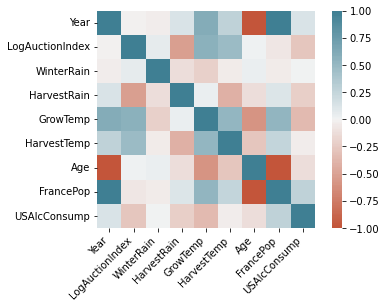

In [6]:
data = wine

corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [7]:
wine.corr()

,Year,LogAuctionIndex,WinterRain,HarvestRain,GrowTemp,HarvestTemp,Age,FrancePop,USAlcConsump
Year,1.000000,-0.011346,-0.032424,0.128569,0.600924,0.277000,-1.000000,0.986137,0.131949
LogAuctionIndex,-0.011346,1.000000,0.058326,-0.525882,0.559727,0.469832,0.011346,-0.076993,-0.271188
WinterRain,-0.032424,0.058326,1.000000,-0.120258,-0.214181,-0.046874,0.032424,-0.045196,0.004174
HarvestRain,0.128569,-0.525882,-0.120258,1.000000,0.036437,-0.410439,-0.128569,0.112394,-0.220185
GrowTemp,0.600924,0.559727,-0.214181,0.036437,1.000000,0.513076,-0.600924,0.516918,-0.352116
HarvestTemp,0.277000,0.469832,-0.046874,-0.410439,0.513076,1.000000,-0.277000,0.250442,-0.035964
Age,-1.000000,0.011346,0.032424,-0.128569,-0.600924,-0.277000,1.000000,-0.986137,-0.131949
FrancePop,0.986137,-0.076993,-0.045196,0.112394,0.516918,0.250442,-0.986137,1.000000,0.269647
USAlcConsump,0.131949,-0.271188,0.004174,-0.220185,-0.352116,-0.035964,-0.131949,0.269647,1.000000


### Dataset Train-test Splitting

Next, we will split the dataset into a training set and a test set. There are various ways of splitting the dataset, we will first do an example of chronological separation. 

We are showing chronological splitting using Boolean predicates, the same way we used them in the last lab, to show again how pandas nicely behave with SQL-like query. SIde note on python notation for booleans:
- A & B: A and B
- A | B: A or B
- A == B: True if A is equal to B (works with string as well)
- etc

In [ ]:
# Example 1: Year of production split
wine_train1 = wine[wine['Year'] <= 1985]
wine_test1 = wine[wine['Year'] > 1985]

len(wine_train1), len(wine_test1)

In [ ]:
# Produce wine_train2 which is composed of wine that's older than 40
wine_train2 = wine[wine['Age'] > 40]

# How many rows does this have? (use the function nrows(dataframe)) 
len(wine_train2)

In [ ]:
# Produce wine.train3 which is composed of wine less than Year 1985 or older than year 1990. 
wine_train3 = wine[(wine['Year'] <= 1985) | (wine['Year'] > 1990)]

# How many rows is the rest of the dataset, other than wine.train3? 
len(wine_train3)

# Are these good ideas? (Why)

In [12]:
# proper way of splitting the dataset into train and test is randomly!

# You can do it manually using pandas!
wine_train = wine.sample(frac=0.8, random_state=25)
wine_test = wine.drop(wine_train.index)

print(f"No. of training examples: {wine_train.shape[0]}")
print(f"No. of testing examples: {wine_test.shape[0]}")

No. of training examples: 37
No. of testing examples: 9


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# or you can take advantage of sklearn
wine_train, wine_test = train_test_split(wine, train_size=0.8, random_state=25)

print(f"No. of training examples: {wine_train.shape[0]}")
print(f"No. of testing examples: {wine_test.shape[0]}")

## Note the rounding is different if done on your own or with the function

No. of training examples: 36
No. of testing examples: 10


# AAA important detail to always keep in mind!!!!!!!!!

We will be using some stochastic models, so it's extremely important for you to set a random state (aka seed) for the reproducibility of your results. So, unless it's precisely your intention, please set the random state at the beginning of your stochastic code! 

# Side note for the future: train, validate, test!

We have split the data in training and test. Sometimes, especially when we are not sure about which model is going to be the better performer (or when there are hyperparameters to be tuned), we can try to have a fairer estimate of the test error than the training error. We know that theory says when the number of observations goes to infinty the two errors should be the same, but with finite sample there can be a huge difference (the training error is usually a large underestimation of the test error, why?)

In the future we will talk about a 3 way splitting:

1. the training set, which we will train the model on, with the set of hyperparameters
2. the validation set, which will give us a better estimate of the test error, helping us understanding the real performance of a model
3. the test set, which is the set over which we have our predictions made.

In general, this is not the only way to validate your model, as you will see cross validation and bootstrapping!

## Training the Model

In [13]:
from sklearn.linear_model import LinearRegression

# choose the features to be used
cols = ['WinterRain', 'HarvestRain', 'GrowTemp', 'HarvestTemp', 'Age', 'FrancePop', 'USAlcConsump']
X_train = wine_train[cols]
y_train = wine_train['LogAuctionIndex']

model1 = LinearRegression().fit(X_train, y_train)

### Evaluating the model

If we want to use evaluation metrics that are not contained in the standard package, such as Out-of-sample R-squared, we can define our own evaluation function and take advantage of `numpy` for certain array computations

In [14]:
R_squared = model1.score(X_train, y_train)
#how well your beta values represent the model
print('R_squared:', R_squared)

intercept = model1.intercept_
coefficients = model1.coef_

print('Intercept:', intercept)
print('Coefficients:', coefficients)
#beta values it calculated

# # compute out-of-sample R_squared
X_test = wine_test[cols]
y_test = wine_test['LogAuctionIndex']

wine_predictions = model1.predict(X_test)
OSR_squared = model1.score(X_test, y_test)
print(OSR_squared)


#try to explore statsmodel as well

R_squared: 0.7425917605070094
Intercept: -2.0790365701478644
Coefficients: [ 0.0010056  -0.00426941  0.72850145 -0.03003402  0.00246266 -0.06517306
  0.06213694]
0.8352830419864786


In [15]:
## IF YOU WANT YOU CAN COMPUTE YOUR OWN VERSION OF R2 AND OTHER EVALUATION METRICS ##
## Compute Out-of-sample R-squared using the test set
#this is the test on the new data/real world testing.gives a better value

def OSR2(model, df_train, df_test, dependent_var):   
    y_test = df_test[dependent_var]
    y_pred = model.predict(df_test.loc[:, df_test.columns != dependent_var])
    RSS = np.sum((y_test - y_pred)**2)
    TSS = np.sum((y_test - np.mean(df_test[dependent_var]))**2)    

    return 1 - RSS/TSS

## Compute Out-of-sample adjusted R-squared using the test set

def adjOSR2(model, df_train, df_test, dependent_var): 
    n = df_train.shape[0]
    k = len(df_test.columns) -1
    y_test = df_test[dependent_var]
    y_pred = model.predict(df_test.loc[:, df_test.columns != dependent_var])
    RSS = np.sum((y_test - y_pred)**2)
    TSS = np.sum((y_test - np.mean(df_test[dependent_var]))**2)    

    return 1 - (RSS/TSS)*(n-1)/(n-k-1)


total_cols = [el for el in cols]
total_cols.append('LogAuctionIndex')
print(f'Out of sample R2: {OSR2(model1, wine_train[total_cols], wine_test[total_cols], "LogAuctionIndex")}')
print(f'Out of sample adjusted R2: {adjOSR2(model1, wine_train[total_cols], wine_test[total_cols], "LogAuctionIndex")}')

Out of sample R2: 0.8352830419864786
Out of sample adjusted R2: 0.7955237762590769


### Variance Inflation Factor (VIF)
Vif gives a useful information concerning our features about how actually helpful they are in modeling our data.
It is a linear regression of one of the regressor against all the others $\implies$ looking for multicollinearity $\implies$ if we are getting an $R^2 \approx 1$ the variable is redundant (and may actually give us a worst test rate)

\begin{equation}
    VIF_j = \frac{1}{1-R_j^2}
\end{equation}

In [19]:
# Calculate Variance Inflation Factor for each explanatory variable
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIF(df, columns):
    
    values = sm.add_constant(df[columns]).values  # the dataframe passed to VIF must include the intercept term. We add it the same way we did before.
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    
    return pd.Series(vif[1:], index=columns)

In [20]:
cols = ['WinterRain', 'HarvestRain', 'GrowTemp', 'HarvestTemp', 'Age', 'FrancePop', 'USAlcConsump']
VIF(wine_train, cols)

WinterRain        1.204676
HarvestRain       1.507585
GrowTemp          3.077595
HarvestTemp       1.798802
Age             140.068444
FrancePop       148.508182
USAlcConsump      4.497809
dtype: float64

### A better model...

In [21]:
# Remove FrancePop
#ideally values should be less than 5
VIF(wine_train, ['WinterRain', 'HarvestRain', 'GrowTemp', 'HarvestTemp', 'Age', 'USAlcConsump'])

WinterRain      1.170934
HarvestRain     1.493596
GrowTemp        2.960333
HarvestTemp     1.778889
Age             2.161046
USAlcConsump    1.753117
dtype: float64

In [22]:
#new train without francepop
cols = ['WinterRain', 'HarvestRain', 'GrowTemp', 'HarvestTemp', 'Age', 'USAlcConsump']
X_train = wine_train[cols]
y_train = wine_train['LogAuctionIndex']

model2 = LinearRegression().fit(X_train, y_train)

In [23]:
R_squared = model2.score(X_train, y_train)
print('R_squared:', R_squared)

intercept = model2.intercept_
coefficients = model2.coef_

print('Intercept:', intercept)
print('Coefficients:', coefficients)

# # compute out-of-sample R_squared
X_test = wine_test[cols]
y_test = wine_test['LogAuctionIndex']

wine_predictions = model2.predict(X_test)
OSR_squared = model2.score(X_test, y_test)
print(OSR_squared)

R_squared: 0.7409696043912073
Intercept: -6.127156642471294
Coefficients: [ 0.00104183 -0.00431565  0.73884621 -0.03257626  0.02470523  0.02390142]
0.8442675355735229


### Feature Engineering
Remove USAlcConsump --> questioning some features from experience (is there a real correlation with how wine is produced?)

In [24]:
cols = ['WinterRain', 'HarvestRain', 'GrowTemp', 'HarvestTemp', 'Age']
X_train = wine_train[cols]
y_train = wine_train['LogAuctionIndex']

model3 = LinearRegression().fit(X_train, y_train)

R_squared = model3.score(X_train, y_train)
print('R_squared:', R_squared)

intercept = model3.intercept_
coefficients = model3.coef_

print('Intercept:', intercept)
print('Coefficients:', coefficients)

# # compute out-of-sample R_squared
X_test = wine_test[cols]
y_test = wine_test['LogAuctionIndex']

wine_predictions = model3.predict(X_test)
OSR_squared = model3.score(X_test, y_test)
print(OSR_squared)

R_squared: 0.7399772004058665
Intercept: -5.454818334791947
Coefficients: [ 0.00100655 -0.00435847  0.71513392 -0.03080978  0.02344919]
0.8492074170180677


## 2. MLR (NUMERICAL + CATEGORICAL VARIABLES)

For this part, we will use a second dataset, `wine_disagg.csv`, which contains additional information related to the Wineries. The `Winery` variable is a `string object`, but we can do some transformations that will help us fit it into the continuous model
This is if we have categorical values as well

### Two Wineries
Before constructing a complete model for all the wineries, let's first attempt to regress on only 2 wineries. We pick Cheval Blanc and Cos d'Estournel as an example

In [ ]:
#import cell missing

In [ ]:
wine_two = wine_new[(wine_new['Winery'] == 'Cheval Blanc') | (wine_new['Winery'] == 'Cos d\'Estournel')]

wine_two_train = wine_two.sample(frac=0.8, random_state=25)
wine_two_test = wine_two.drop(wine_two_train.index)
wine_two_train.tail()

### Passing a categorical variable
To use a categorical variables like `Winery`, we have to manipulate the string first, getting a dummy variable and finally we can simply pass it to the formula.

In [ ]:
cols = ['Winery','WinterRain', 'HarvestRain', 'GrowTemp', 'HarvestTemp', 'Age']
X_train = wine_two_train[cols]
X_train = pd.get_dummies(data=X_train, drop_first=True)
y_train = wine_two_train['LogAuction']

model5 = LinearRegression().fit(X_train, y_train)

R_squared = model5.score(X_train, y_train)
print('R_squared:', R_squared)

### More Wineries
Now let's expand to the complete set of values that `Winery` can take:

In [ ]:
X_train = wine_new_train[cols]
X_train = pd.get_dummies(data=X_train, drop_first=True)
y_train = wine_new_train['LogAuction']

model6 = LinearRegression().fit(X_train, y_train)

R_squared = model6.score(X_train, y_train)
print('R_squared:', R_squared)

#with the winery feature the score increased

# OVERFITTING: INTUITION ON A LOW DIMENSIONAL CASE

In [25]:
import numpy as np
import pandas as pd
import os

In [26]:
S = 10
x = np.linspace(start=1, stop=20, num=S)
#10 points between 1 and 20
beta = 0.4
eps = np.random.normal(size = S)
#noise epsilon

true_y = beta*x
y = beta*x + eps



import statsmodels.api as sm

# Featured to be used, x and its powers up to 10
X_train = []
for i in range(9):
    X_train.append(x**(i+1))

X_train = np.array(X_train).T
y_train = y

# We must add an intercept as the standard model doesn't automatically fit one
X_train = sm.add_constant(X_train)

# fit the data to the model
model = sm.OLS(y_train, X_train).fit()

print(model.summary())

x_grid = np.arange(1, 20, 0.01)
X_grid = [np.ones(S)]
for i in range(9):
    X_grid.append(x_grid**(i+1))
    
import matplotlib.pyplot as plt
y_grid = model.params*X_grid

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 02 Sep 2022   Prob (F-statistic):                nan
Time:                        12:42:46   Log-Likelihood:                 58.026
No. Observations:                  10   AIC:                            -96.05
Df Residuals:                       0   BIC:                            -93.03
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.3262        inf          0        n

/Users/serahverg/opt/miniconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/serahverg/opt/miniconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1749: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/serahverg/opt/miniconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
/var/folders/1j/vhrxwjz94tn0tsz00qlnqw8m0000gn/T/ipykernel_10738/2473557030.py:32: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when cre

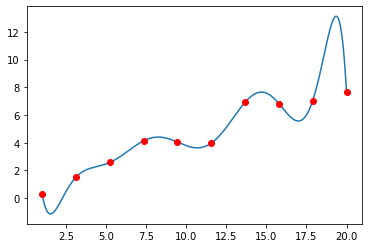

In [27]:
curve = np.flip(np.array(model.params))
y_2 = [np.polyval(curve, i) for i in x_grid]
plt.plot(x_grid,y_2)
plt.plot(x, y, 'o', color='red')

In [29]:
X_train = x
X_train = sm.add_constant(X_train)

# fit the data to the model
model = sm.OLS(y_train, X_train).fit()


/var/folders/1j/vhrxwjz94tn0tsz00qlnqw8m0000gn/T/ipykernel_10738/2186474857.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_grid = model.params*X_grid


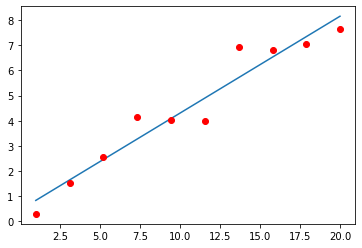

In [30]:
x_grid = np.arange(1, 20, 0.01)
X_grid = [np.ones(S)]

X_grid.append(x_grid)
y_grid = model.params*X_grid
curve = np.flip(np.array(model.params))
y_2 = [np.polyval(curve, i) for i in x_grid]
plt.plot(x_grid,y_2)
plt.plot(x, y, 'o', color='red')

In [ ]:
###### EXERCISE (IF YOU WANT TO PLAY AROUND WITH SOME VERY WELL STRUCTURED DATA) ######
path = os.getcwd() + "/cancer_reg.csv"
dataset = pd.read_csv(path, encoding='latin-1')
dataset.info()

In [ ]:
dataset.describe()